# Caso Práctico 1: Coste de un incidente de seguridad

Predicción del coste de un incidente de seguridad en base a datos generados aleatoriamente

### 1.1. Generación de los datos

In [1]:
import numpy as np
#Creamos dos variables con una muestra de 100 observaciones aleatorias
x=2+np.random.rand(100,1)
y=4+3*np.random.randn(100,1)

### 2. Visualización

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
#Añadir gráficos dentro del Jupyter Notebook

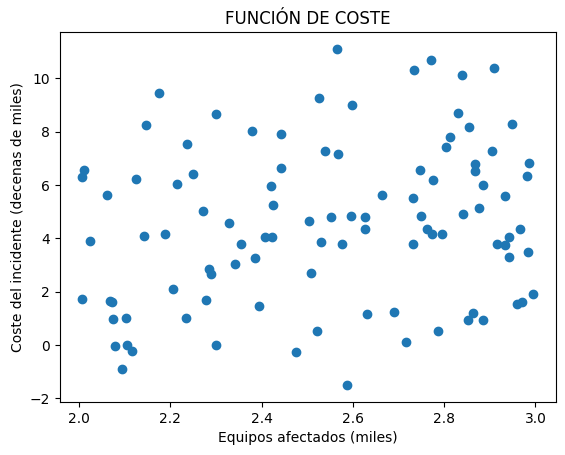

In [4]:
plt.scatter(x,y)
plt.title("FUNCIÓN DE COSTE")
plt.xlabel("Equipos afectados (miles)")
plt.ylabel("Coste del incidente (decenas de miles)")
plt.show()

### 3. Modificación del conjunto de datos

In [5]:
import pandas as pd

In [6]:
df=pd.DataFrame({"Equipos_afectados": x.flatten(),"Coste": y.flatten()}) #Conjunto de datos en un df
#Expresamos los equipos afectados en miles
df["Equipos_afectados"]=df["Equipos_afectados"]*1000
df["Equipos_afectados"]=df["Equipos_afectados"].astype(int)
#Expresamos el coste en decenas de miles
df["Coste"]=df["Coste"]*10000
df["Coste"]=df["Coste"].astype(int)
df.head(10)#Vemos las diez primeras columnas

,Equipos_afectados,Coste
0,2342,30300
1,2425,52523
2,2539,72685
3,2597,89883
4,2867,65394
5,2885,9226
6,2568,71660
7,2854,81701
8,2077,-230
9,2006,63165


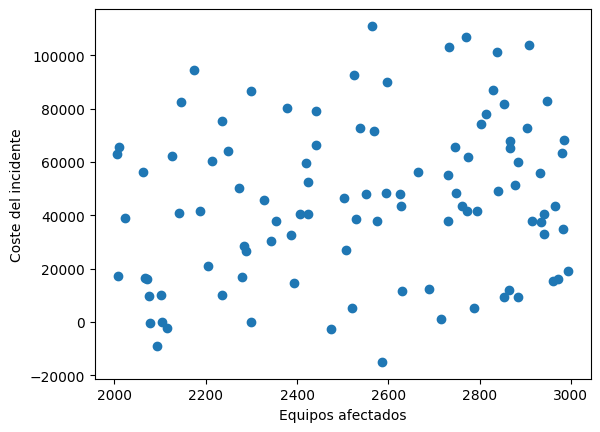

In [7]:
#Representamos el conjunto de datos
plt.scatter(df["Equipos_afectados"], df["Coste"])
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

#### 4.1. Algotimo de ML que minimiza el MSE

In [10]:
from sklearn.linear_model import LinearRegression

In [ ]:
import pydoc
print(pydoc.render_doc(LinearRegression))

Python Library Documentation: class LinearRegression in module sklearn.linear_model._base

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, tol=1e-06, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  tol : float, default=1e-6
 |      The precision of the solution (`coef_`) is determined

In [18]:
lin_reg=LinearRegression().fit(df["Equipos_afectados"].values.reshape(-1, 1), df["Coste"].values)

In [23]:
print("Modelo ajustado:", "y =", lin_reg.intercept_,"+",lin_reg.coef_,"·x")

Modelo ajustado: y = -5449.521362816144 + [20.0282979] ·x


In [25]:
lin_reg.score(df["Equipos_afectados"].values.reshape(-1, 1), df["Coste"].values)

0.04321595477328588